I am going to great a linear algebra model for predicting total infections. The equation will take the form of: y = ax1 + bx2 + c, where y is the log10 of total infections, x1 is the log10 of transportation usage, x2 is the log10 of population density, all by county. I predict the error of this linear model will be fairly high, and most of the effect will come from the intercept. I predict this because the data vizualization seems very noisy when plotted log log.

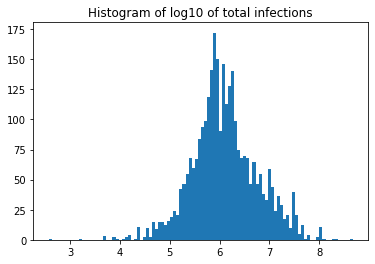

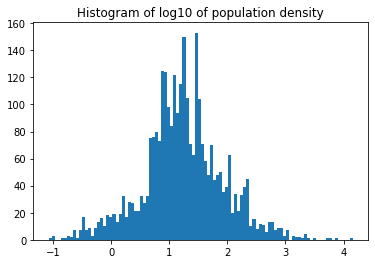

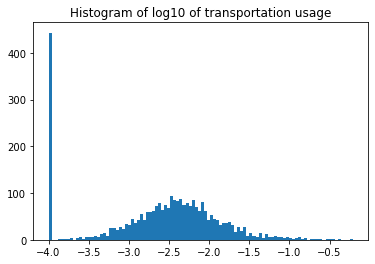

[[ 1.         -3.10679713  1.55453058]
 [ 1.         -2.66886922  1.70364816]
 [ 1.         -2.39966279  1.05107458]
 ...
 [ 1.         -1.46515773  0.04074696]
 [ 1.         -2.95900191  0.6414873 ]
 [ 1.         -1.12899069  0.79542045]]
Intercept is: 6.733526429091897 slope trans is: 0.2976735252636127 slope density is: 0.11874051999939815
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     231.4
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           3.36e-94
Time:                        16:34:52   Log-Likelihood:                -2787.7
No. Observations:                3004   AIC:                             5581.
Df Residuals:                    3001   BIC:                             5599.
Df Model:              

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import math

data = pd.DataFrame(pd.read_csv(r"C:\Users\mdsnb\OneDrive\Documents\GitHub\ChE_2410_Math\Project 1\countydata.csv"))

logdensity = np.log10(np.array(data['Density'].tolist()))
loginf = np.log10(np.array(data['Total infections'].tolist()))
logtrans = np.log10(np.array(data['Public Transportation Usage'].tolist())+.0000001)
intercept = np.ones(len(logdensity))

for k in range(len(logtrans)):
    if logtrans[k] <= -4:
        logtrans[k] = -4

plt.hist(loginf, bins = 100)
plt.title('Histogram of log10 of total infections')
plt.show()
plt.hist(logdensity, bins = 100)
plt.title('Histogram of log10 of population density')
plt.show()
plt.hist(logtrans, bins = 100)
plt.title('Histogram of log10 of transportation usage')
plt.show()

matrix = np.vstack((intercept, logtrans, logdensity)).T
print(matrix)

tmp = inv(np.matmul(np.transpose(matrix), matrix))

interceptvalue, slopetrans, slopedensity = tmp @ np.transpose(matrix) @ loginf

print('Intercept is:', interceptvalue, "slope trans is:", slopetrans, 'slope density is:', slopedensity)

model = sm.OLS(loginf, matrix).fit()

print(model.summary())